In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('tips.csv')

In [4]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [5]:
gorjetas = df.rename(columns = renomear)

In [6]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [8]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [9]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [10]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [11]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [12]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [13]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [14]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Análise 1 - Valor da Gorjeta

In [15]:
import seaborn as sns

<AxesSubplot: xlabel='valor_da_conta', ylabel='gorjeta'>

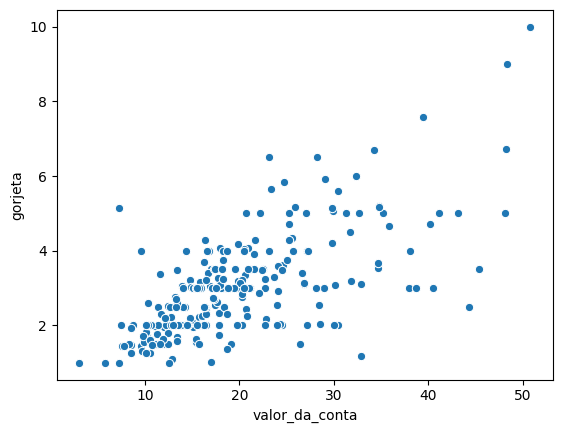

In [16]:
# se o valor da gorjeta aumenta de acordo com a gorjeta 
sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

In [17]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [18]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

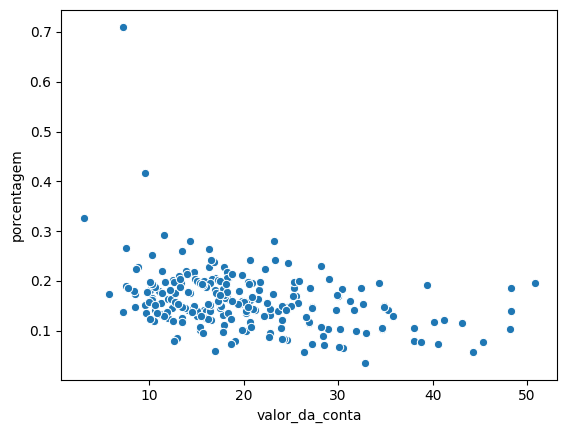

In [19]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

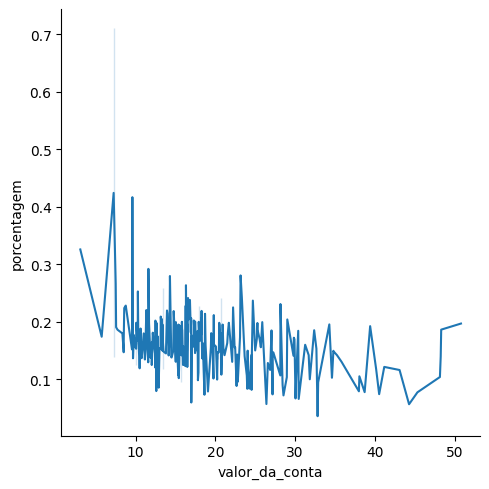

In [20]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

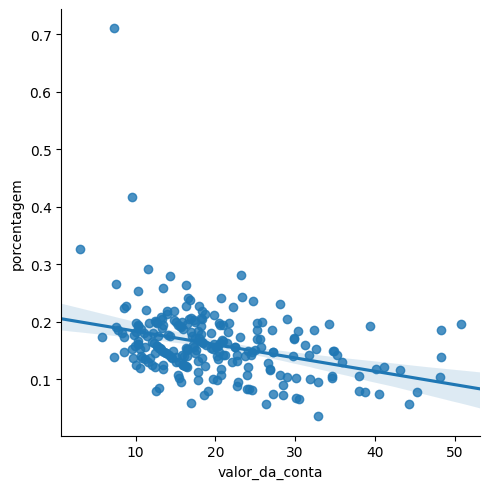

In [21]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [22]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.078927
58,11.24,1.76,Sim,Sábado,Jantar,2,0.156584
60,20.29,3.21,Sim,Sábado,Jantar,2,0.158206
61,13.81,2.00,Sim,Sábado,Jantar,2,0.144823
62,11.02,1.98,Sim,Sábado,Jantar,2,0.179673
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.193175
236,12.60,1.00,Sim,Sábado,Jantar,2,0.079365
237,32.83,1.17,Sim,Sábado,Jantar,2,0.035638
240,27.18,2.00,Sim,Sábado,Jantar,2,0.073584


In [23]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163196
std,9.832154,1.401468,0.810751,0.085119
min,3.070000,1.000000,1.000000,0.035638
25%,13.420000,2.000000,2.000000,0.106771
50%,17.920000,3.000000,2.000000,0.153846
75%,26.860000,3.680000,3.000000,0.195059
max,50.810000,10.000000,5.000000,0.710345


In [24]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159328
std,8.255582,1.377190,1.017984,0.039910
min,7.250000,1.000000,1.000000,0.056797
25%,13.325000,2.000000,2.000000,0.136906
50%,17.590000,2.740000,2.000000,0.155625
75%,22.755000,3.505000,3.000000,0.185014
max,48.330000,9.000000,6.000000,0.291990


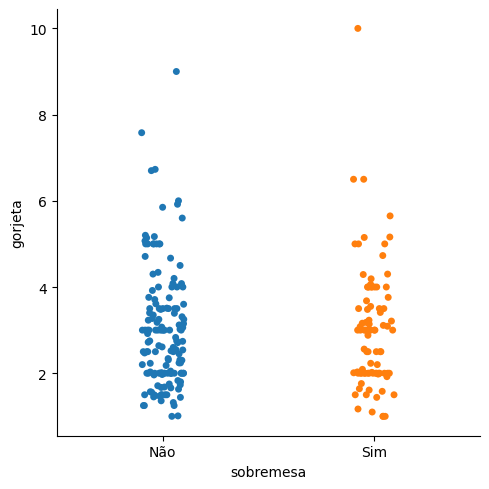

In [26]:
# gráfico categórico
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

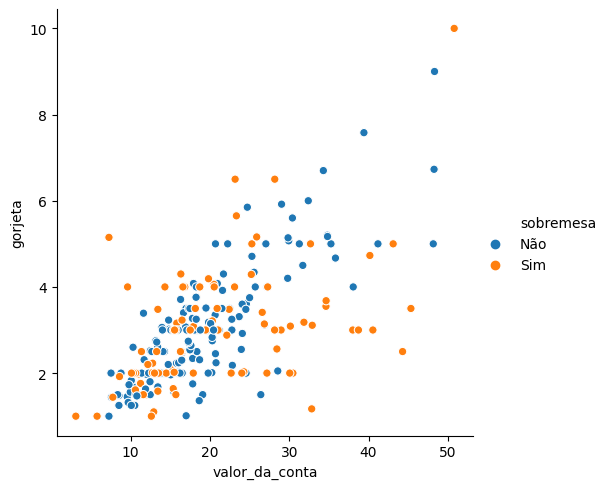

In [27]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

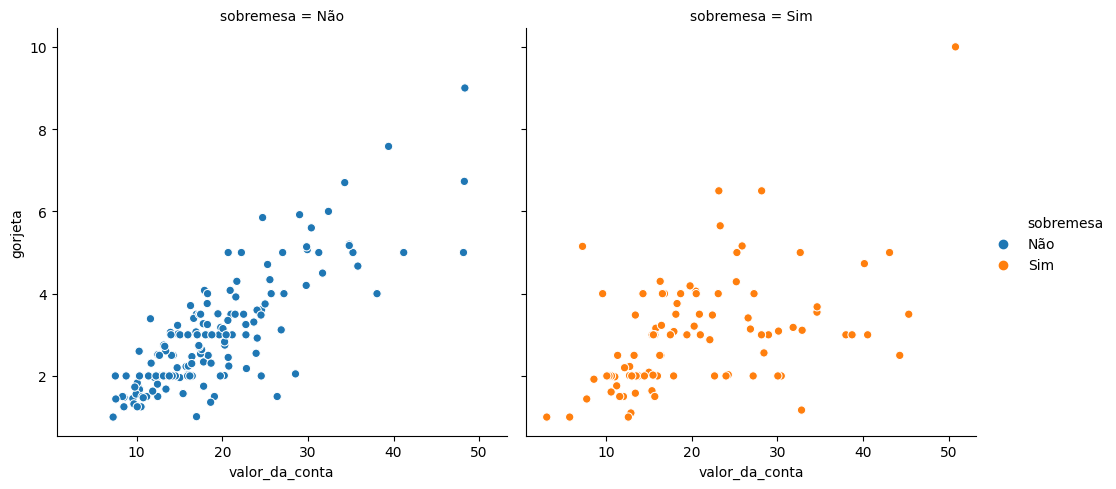

In [28]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

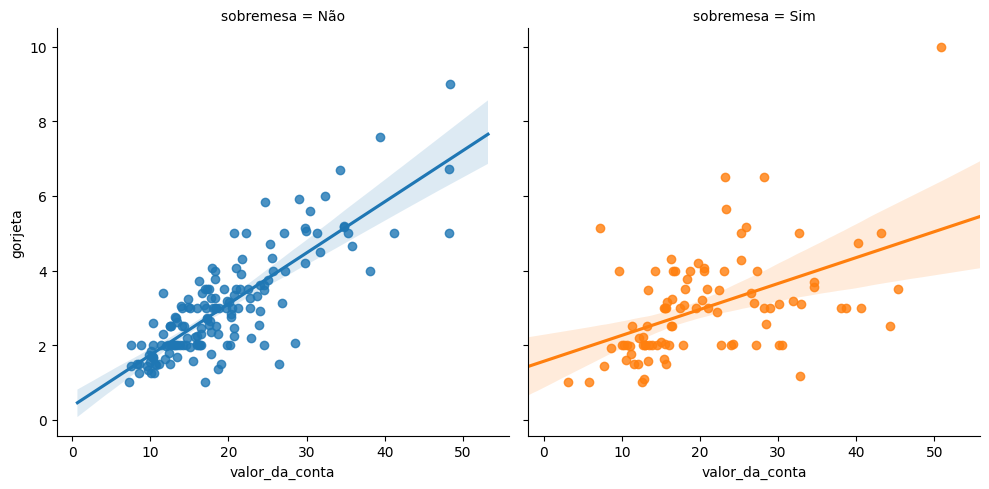

In [29]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

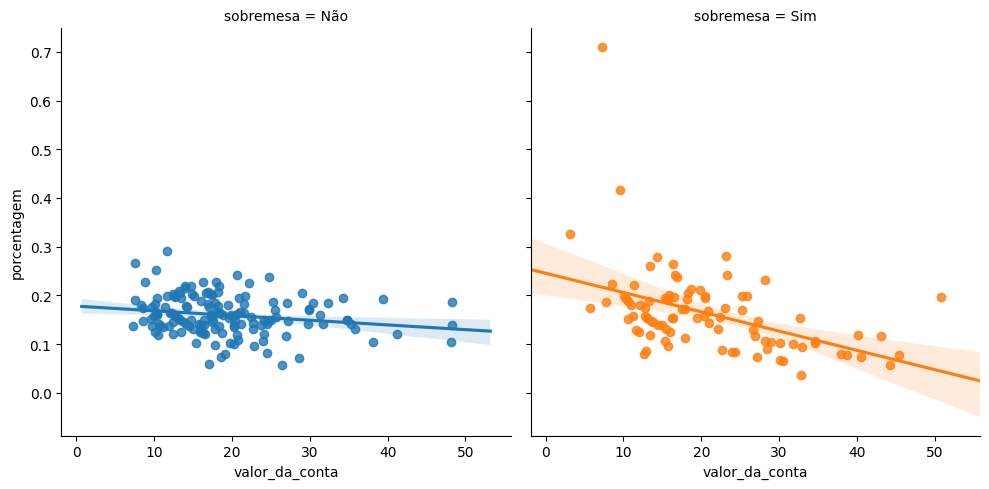

In [30]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

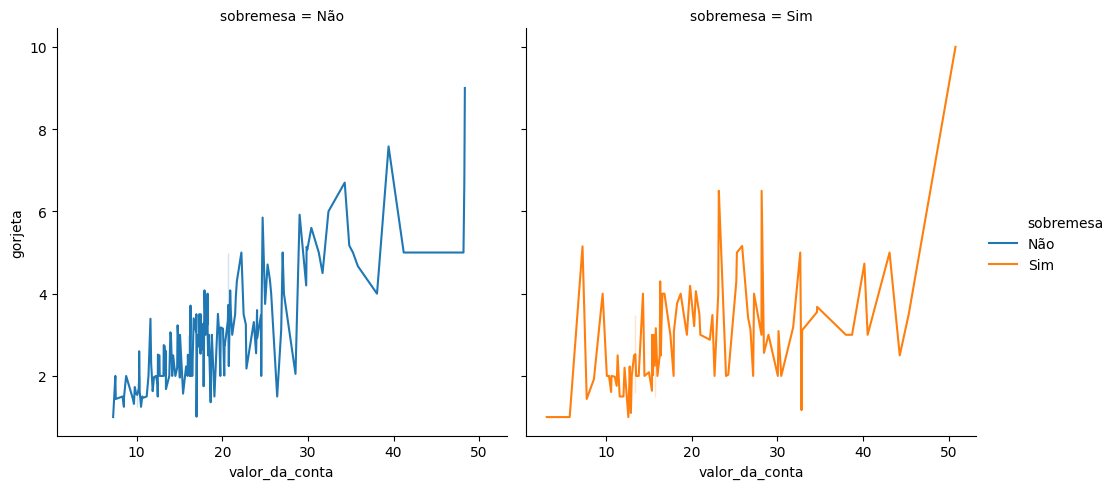

In [31]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

In [32]:
from scipy.stats import ranksums

In [35]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [38]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.5826828381528689, pvalue=0.5601068283978767)

In [37]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5601068283978767


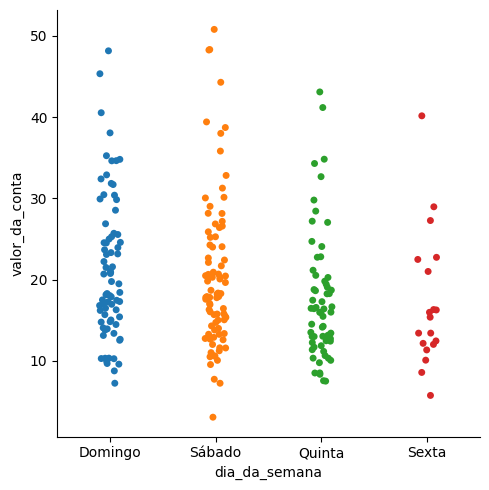

In [39]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

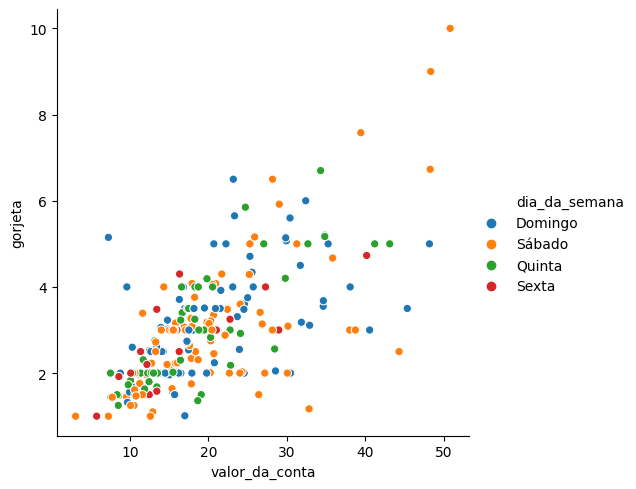

In [40]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

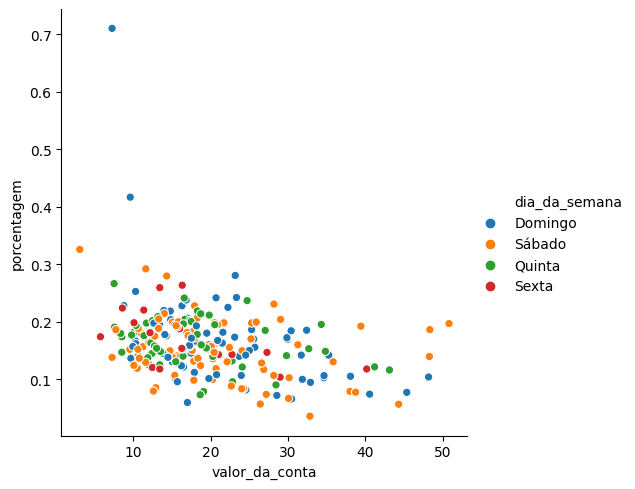

In [41]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

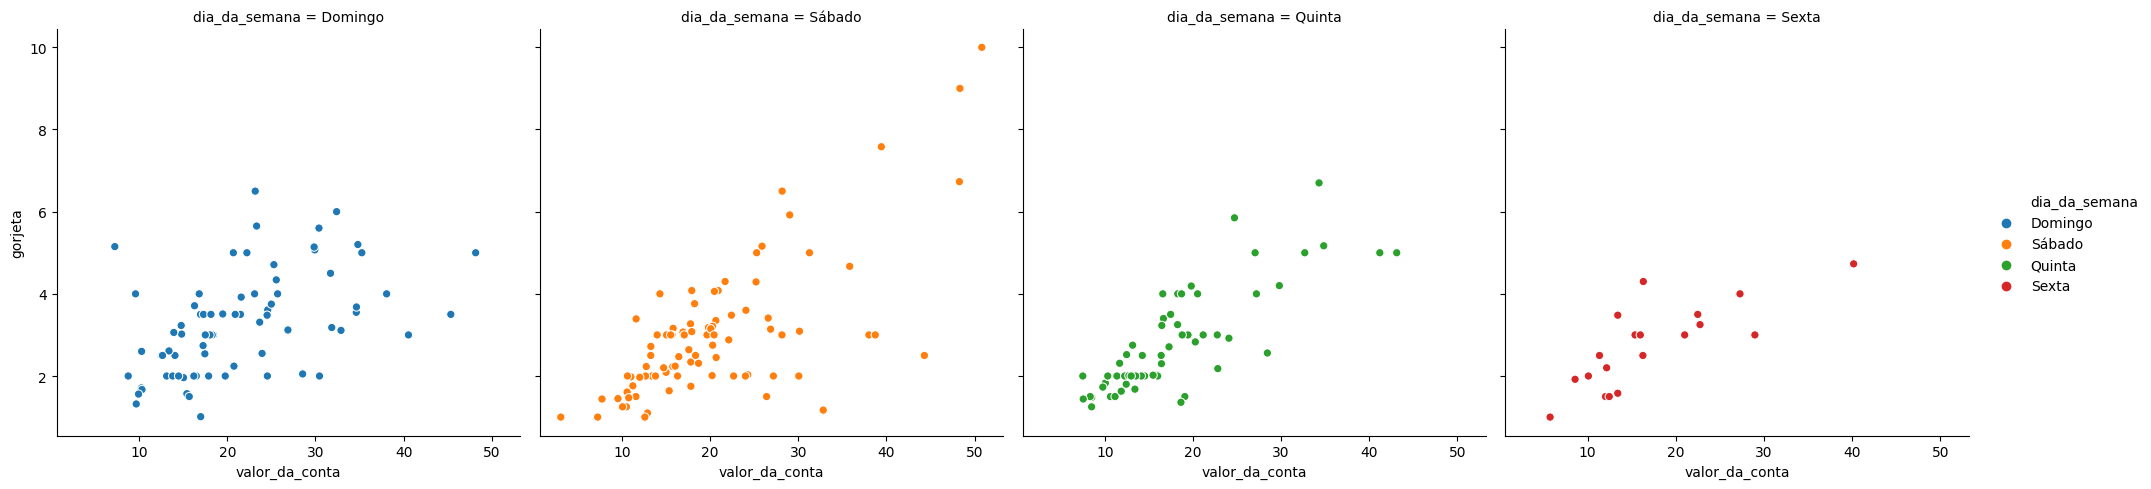

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

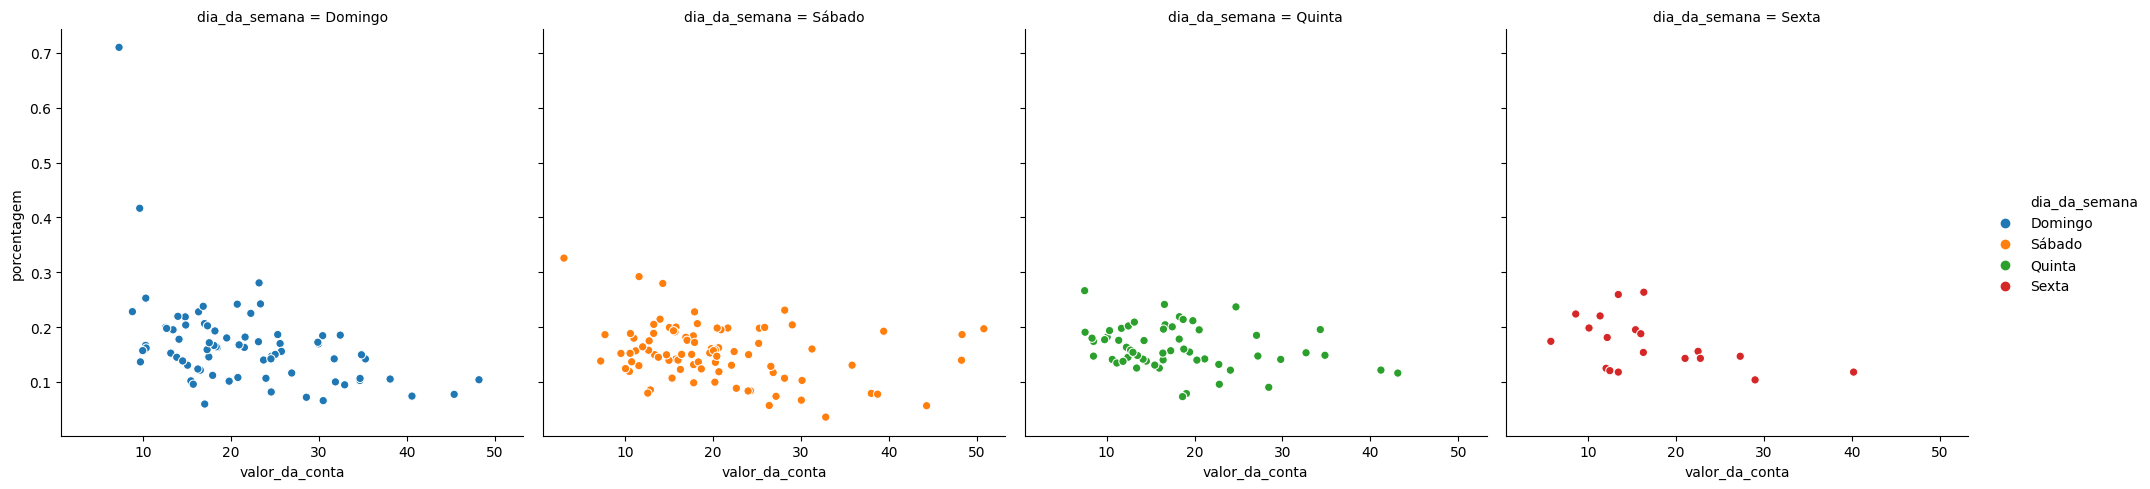

In [43]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

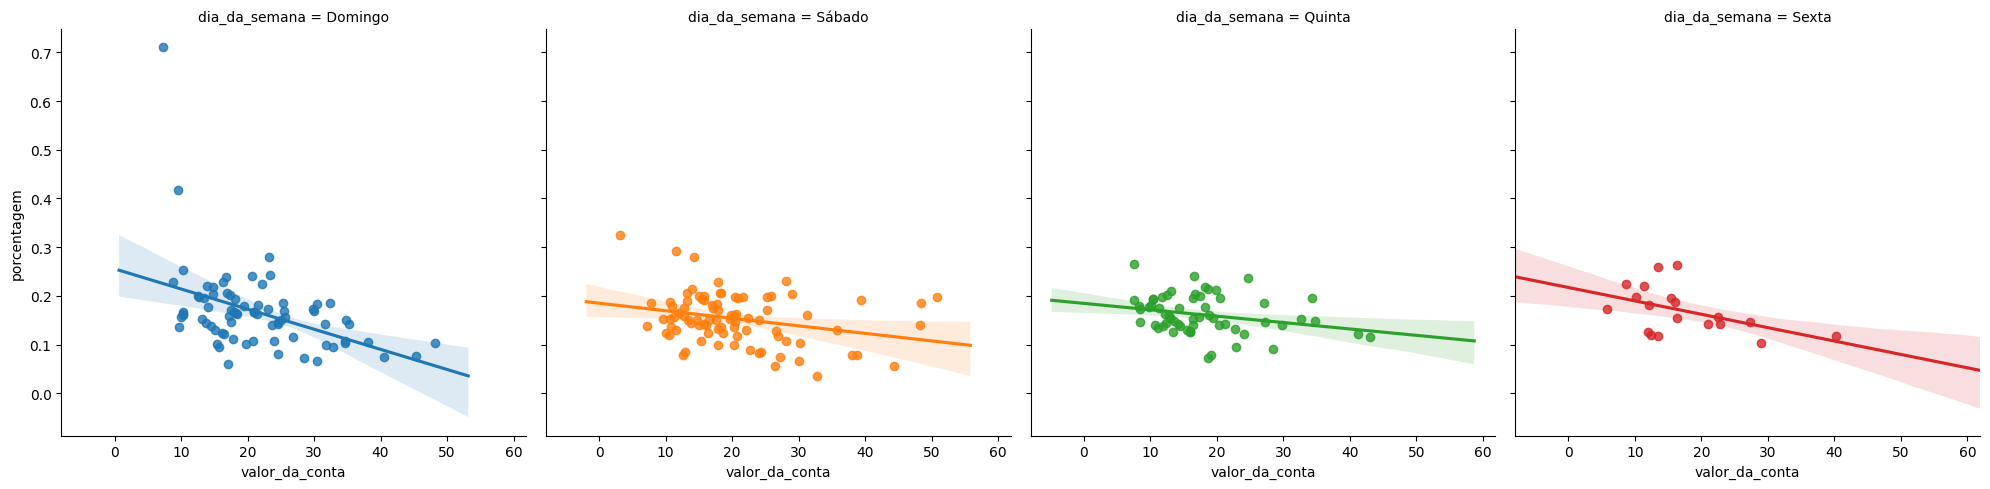

In [44]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [46]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [47]:
gorjetas.groupby(['dia_da_semana']).mean()

C:\Users\55819\AppData\Local\Temp\ipykernel_7620\159429171.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166897
Quinta,17.682742,2.771452,2.451613,0.161276
Sexta,17.151579,2.734737,2.105263,0.169913
Sábado,20.441379,2.993103,2.517241,0.153152


In [48]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

C:\Users\55819\AppData\Local\Temp\ipykernel_7620\1513838919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166897
Quinta,17.682742,2.771452,0.161276
Sexta,17.151579,2.734737,0.169913
Sábado,20.441379,2.993103,0.153152


In [49]:
gorjetas.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

In [50]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

In [51]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [52]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [53]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [54]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


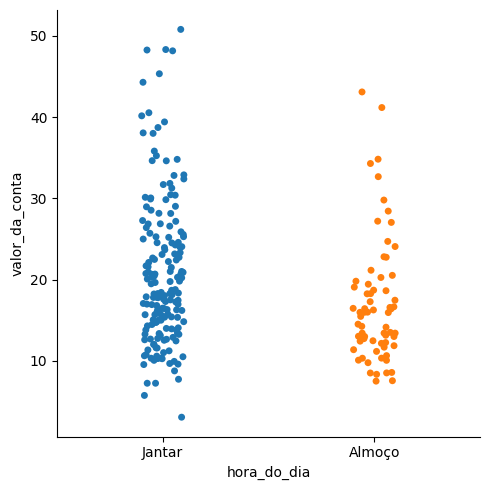

In [55]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

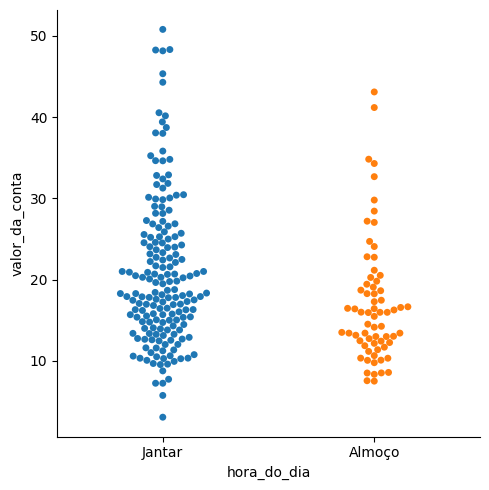

In [56]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot: xlabel='hora_do_dia', ylabel='valor_da_conta'>

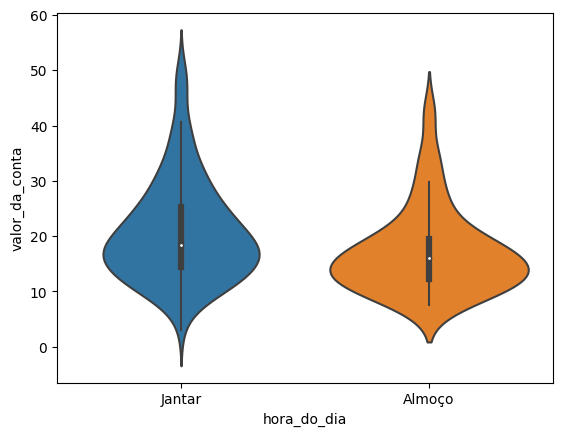

In [57]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot: xlabel='hora_do_dia', ylabel='valor_da_conta'>

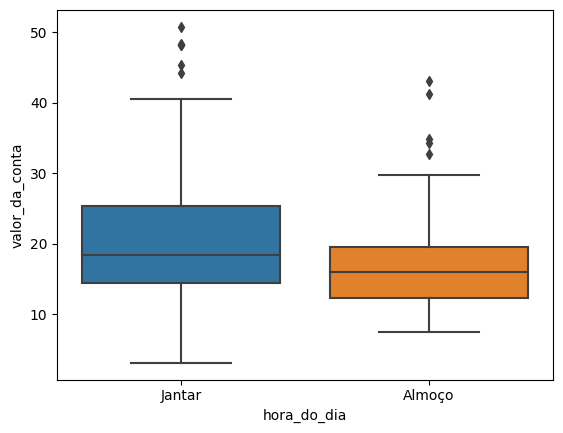

In [58]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [59]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot: xlabel='valor_da_conta'>

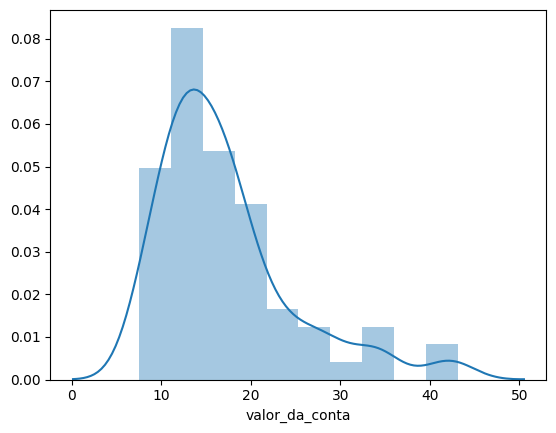

In [60]:
sns.distplot(almoco)

<AxesSubplot: xlabel='valor_da_conta'>

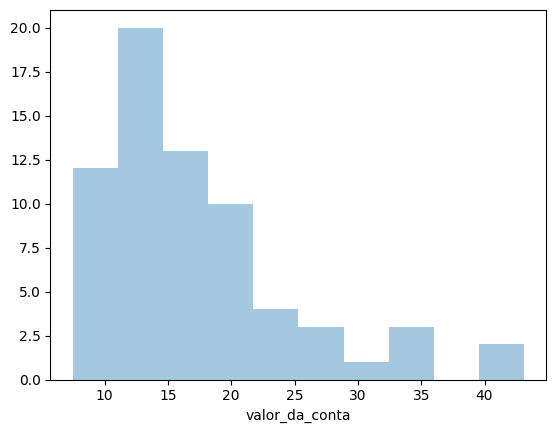

In [61]:
sns.distplot(almoco, kde=False)

In [62]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<AxesSubplot: xlabel='valor_da_conta'>

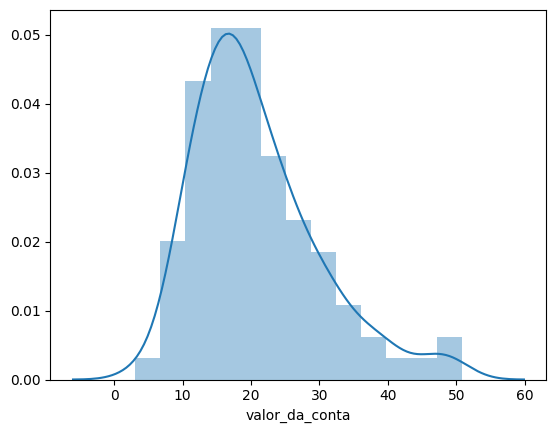

In [63]:
sns.distplot(jantar)

<AxesSubplot: xlabel='valor_da_conta'>

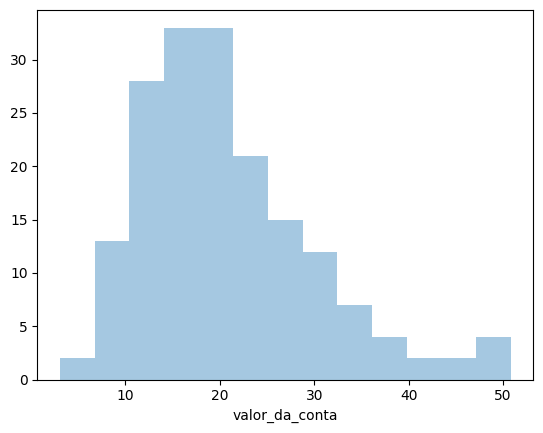

In [64]:
sns.distplot(jantar, kde=False)

In [65]:
gorjetas.groupby(['hora_do_dia']).mean()

C:\Users\55819\AppData\Local\Temp\ipykernel_7620\1714704720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.164128
Jantar,20.797159,3.102670,2.630682,0.159518


In [66]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

C:\Users\55819\AppData\Local\Temp\ipykernel_7620\932548386.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.164128
Jantar,20.797159,3.102670,0.159518


In [67]:
r2 = ranksums(jantar, almoco)

In [68]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [69]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [70]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.1996415076212619, pvalue=0.23027859883366675)

In [71]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.23027859883366675
